In [1]:
! tar -xzf "Data/matrix.mtx.gz" -C data

tar: Error opening archive: Failed to open 'Data/matrix.mtx.gz'


In [2]:
import numpy as np
import pandas as pd
import scanpy as sc

In [3]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

C:\Users\88695\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\Users\88695\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\Users\88695\AppData\Local\Programs\Python\Python3

scanpy==1.9.3 anndata==0.9.2 umap==0.5.3 numpy==1.24.4 scipy==1.11.2 pandas==2.0.3 scikit-learn==1.3.0 statsmodels==0.14.0 python-igraph==0.10.6 pynndescent==0.5.10


C:\Users\88695\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\umap_.py:660: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()


In [4]:
results_file = 'write/pbmc3k.h5ad'  # the file that will store the analysis results

In [5]:
adata2 = sc.read_10x_mtx(
    '../Data/05 - MEN108.2/',  # the directory with the `.mtx` file
    var_names='gene_symbols',                # use gene symbols for the variable names (variables-aAxis index)
    cache=True)                              # write a cache file for faster subsequent reading

... reading from cache file cache\..-Data-05 - MEN108.2-matrix.h5ad


In [6]:
adata3 = sc.read_10x_mtx(
    '../Data/05 - MEN09/',  # the directory with the `.mtx` file
    var_names='gene_symbols',                # use gene symbols for the variable names (variables-aAxis index)
    cache=True)                              # write a cache file for faster subsequent reading

... reading from cache file cache\..-Data-05 - MEN09-matrix.h5ad


In [7]:
adata4 = sc.read_10x_mtx(
    '../Data/05 - MEN09_Tumor/',  # the directory with the `.mtx` file
    var_names='gene_symbols',                # use gene symbols for the variable names (variables-aAxis index)
    cache=True)                              # write a cache file for faster subsequent reading

... reading from cache file cache\..-Data-05 - MEN09_Tumor-matrix.h5ad


In [8]:
adata5 = sc.read_10x_mtx(
    '../Data/05 - Men104.1/',  # the directory with the `.mtx` file
    var_names='gene_symbols',                # use gene symbols for the variable names (variables-axis index)
    cache=True)                              # write a cache file for faster subsequent reading

... reading from cache file cache\..-Data-05 - Men104.1-matrix.h5ad


In [9]:
adata6 = sc.read_10x_mtx(
    '../Data/05 - MEN104.2/',  # the directory with the `.mtx` file
    var_names='gene_symbols',                # use gene symbols for the variable names (variables-aAxis index)
    cache=True)                              # write a cache file for faster subsequent reading

... reading from cache file cache\..-Data-05 - MEN104.2-matrix.h5ad


In [10]:
adata7 = sc.read_10x_mtx(
    '../Data/05 - MEN108.1/',  # the directory with the `.mtx` file
    var_names='gene_symbols',                # use gene symbols for the variable names (variables-aAxis index)
    cache=True)                              # write a cache file for faster subsequent reading

... reading from cache file cache\..-Data-05 - MEN108.1-matrix.h5ad


In [11]:
adata = sc.concat([adata2, adata3, adata4, adata5, adata6, adata7], join= 'outer')

In [12]:
adata.var['gene_ids'] = list(adata2.var['gene_ids'])

In [13]:
adata

AnnData object with n_obs × n_vars = 21807 × 16088
    var: 'gene_ids'

In [14]:
adata.var_names_make_unique()  # this is unnecessary if using `var_names='gene_ids'` in `sc.read_10x_mtx`

In [15]:
# Test sample names
adata

AnnData object with n_obs × n_vars = 21807 × 16088
    var: 'gene_ids'

In [16]:
adata.var

gene_ids
LINC00115    LINC00115
SAMD11          SAMD11
NOC2L            NOC2L
KLHL17          KLHL17
HES4              HES4
...                ...
AL139351.3  AL139351.3
GNAZ              GNAZ
SHISAL1        SHISAL1
LINC00685    LINC00685
MTCP1            MTCP1

[16088 rows x 1 columns]

normalizing counts per cell
    finished (0:00:01)


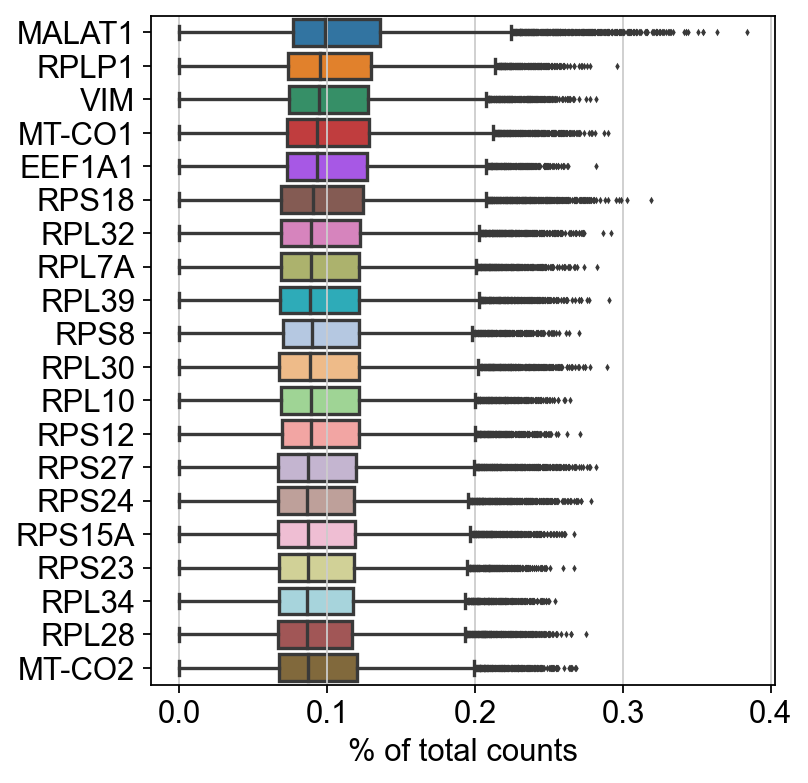

In [17]:
sc.pl.highest_expr_genes(adata, n_top=20, )

In [18]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

filtered out 1413 genes that are detected in less than 3 cells


In [19]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

C:\Users\88695\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


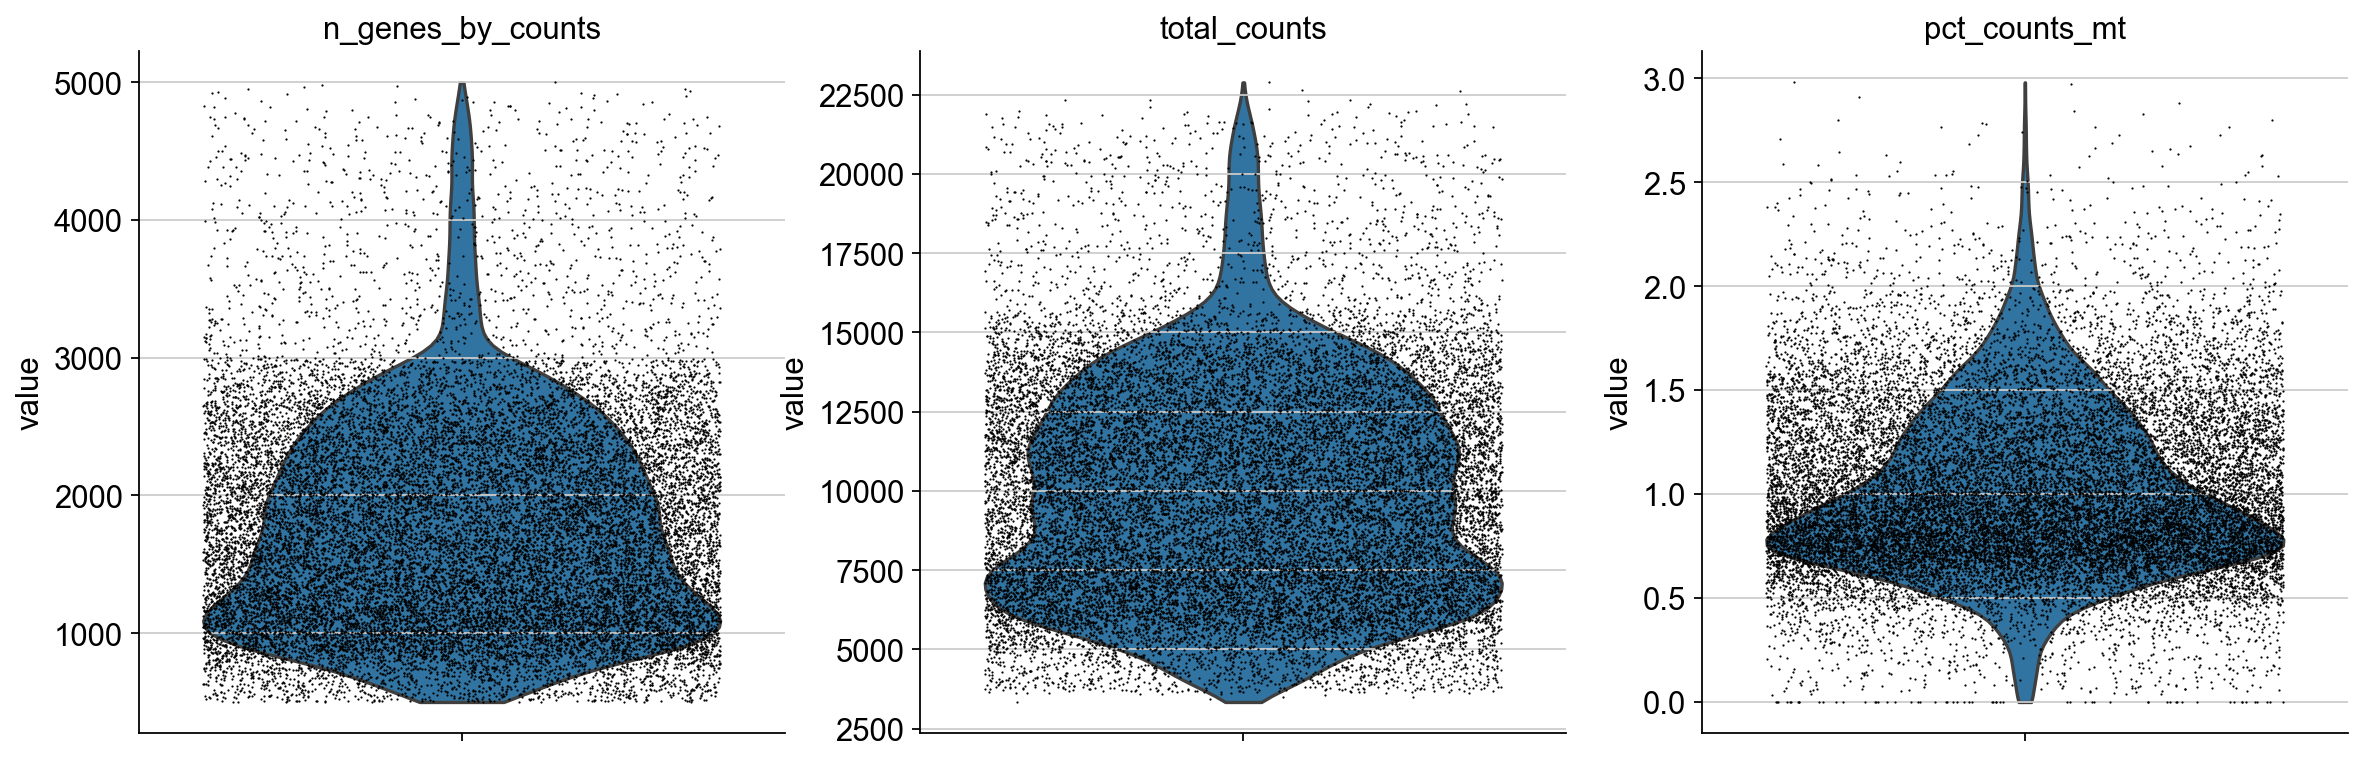

In [20]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

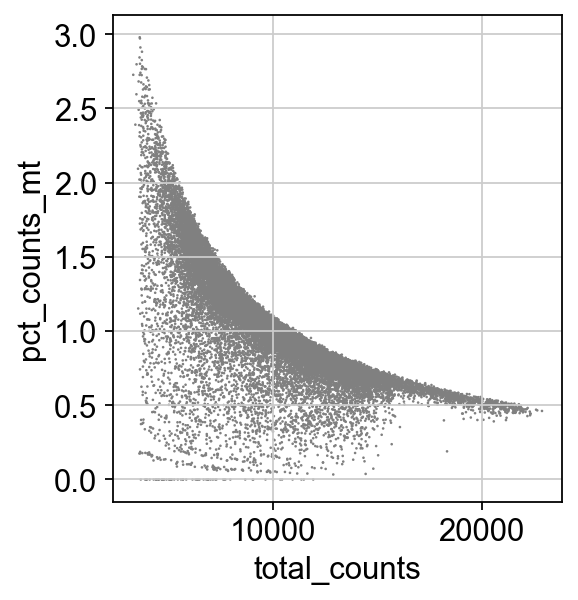

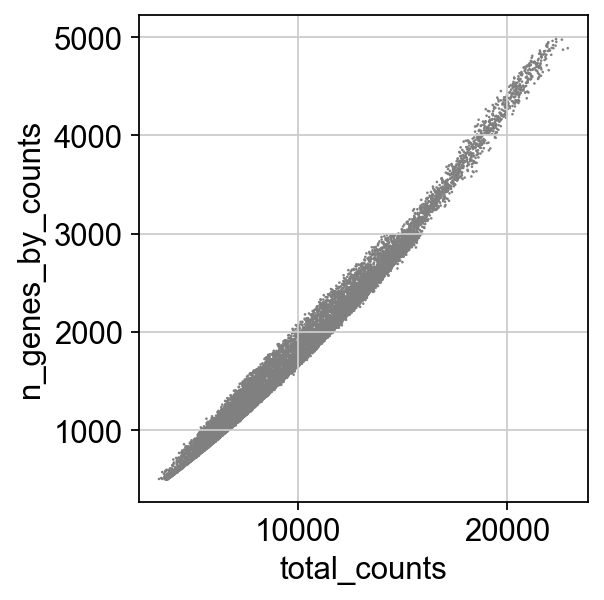

In [21]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt') # quality control 
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [22]:
adata = adata[adata.obs.n_genes_by_counts < 2500, :]
adata = adata[adata.obs.pct_counts_mt < 5, :]

In [23]:
sc.pp.normalize_total(adata, target_sum=1e4) 

C:\Users\88695\AppData\Local\Programs\Python\Python311\Lib\site-packages\scanpy\preprocessing\_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


normalizing counts per cell
    finished (0:00:00)


In [24]:
sc.pp.log1p(adata) # log make numbers readible

In [25]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


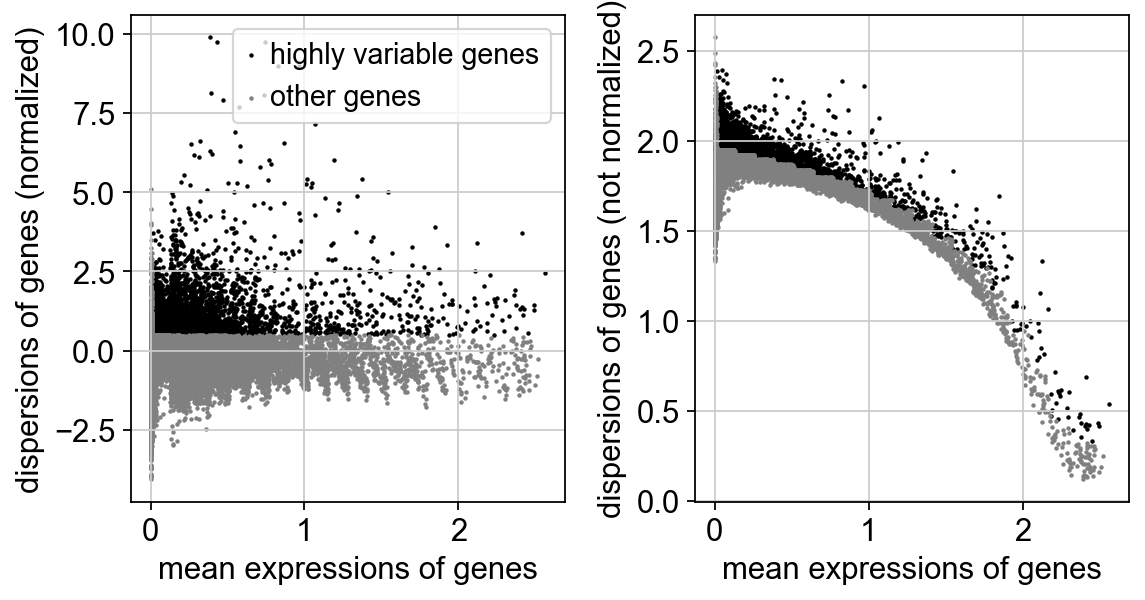

In [26]:
sc.pl.highly_variable_genes(adata)

In [27]:
adata.raw = adata

In [28]:
adata = adata[:, adata.var.highly_variable] # : all rows

In [29]:
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])

regressing out ['total_counts', 'pct_counts_mt']
    sparse input is densified and may lead to high memory use
    finished (0:02:31)


In [30]:
sc.pp.scale(adata, max_value=10)

In [31]:
sc.tl.pca(adata, svd_solver='arpack') # pca dimension reduction

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:10)


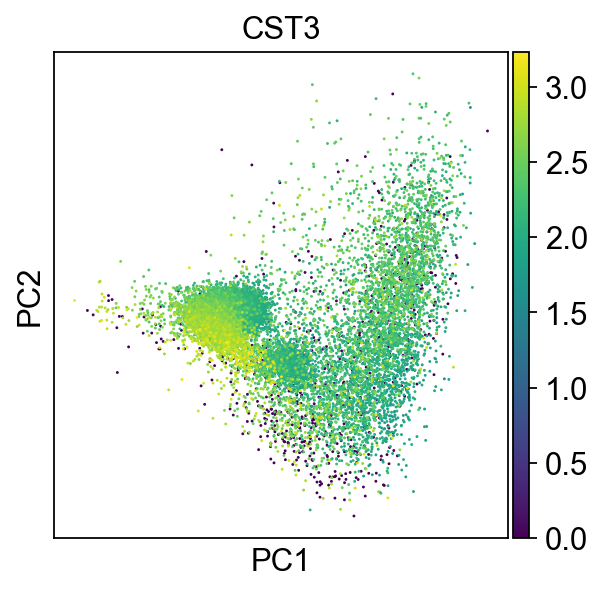

In [32]:
sc.pl.pca(adata, color='CST3')

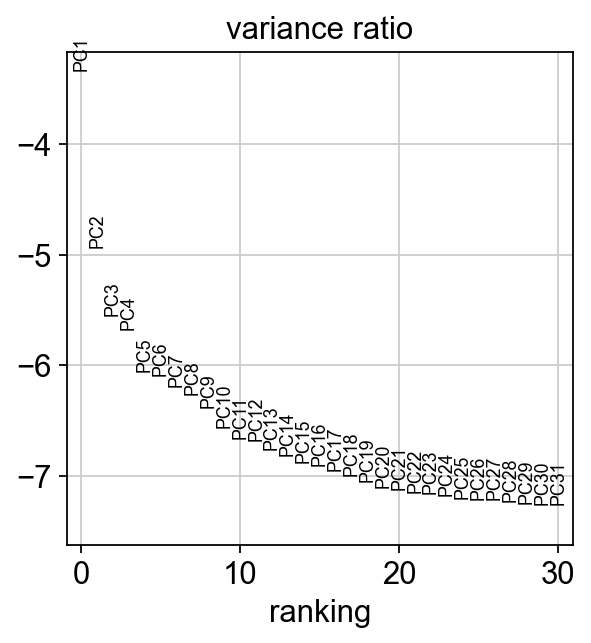

In [33]:
sc.pl.pca_variance_ratio(adata, log=True)

In [34]:
adata

AnnData object with n_obs × n_vars = 18019 × 3191
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

In [35]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:01:16)


In [36]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:36)


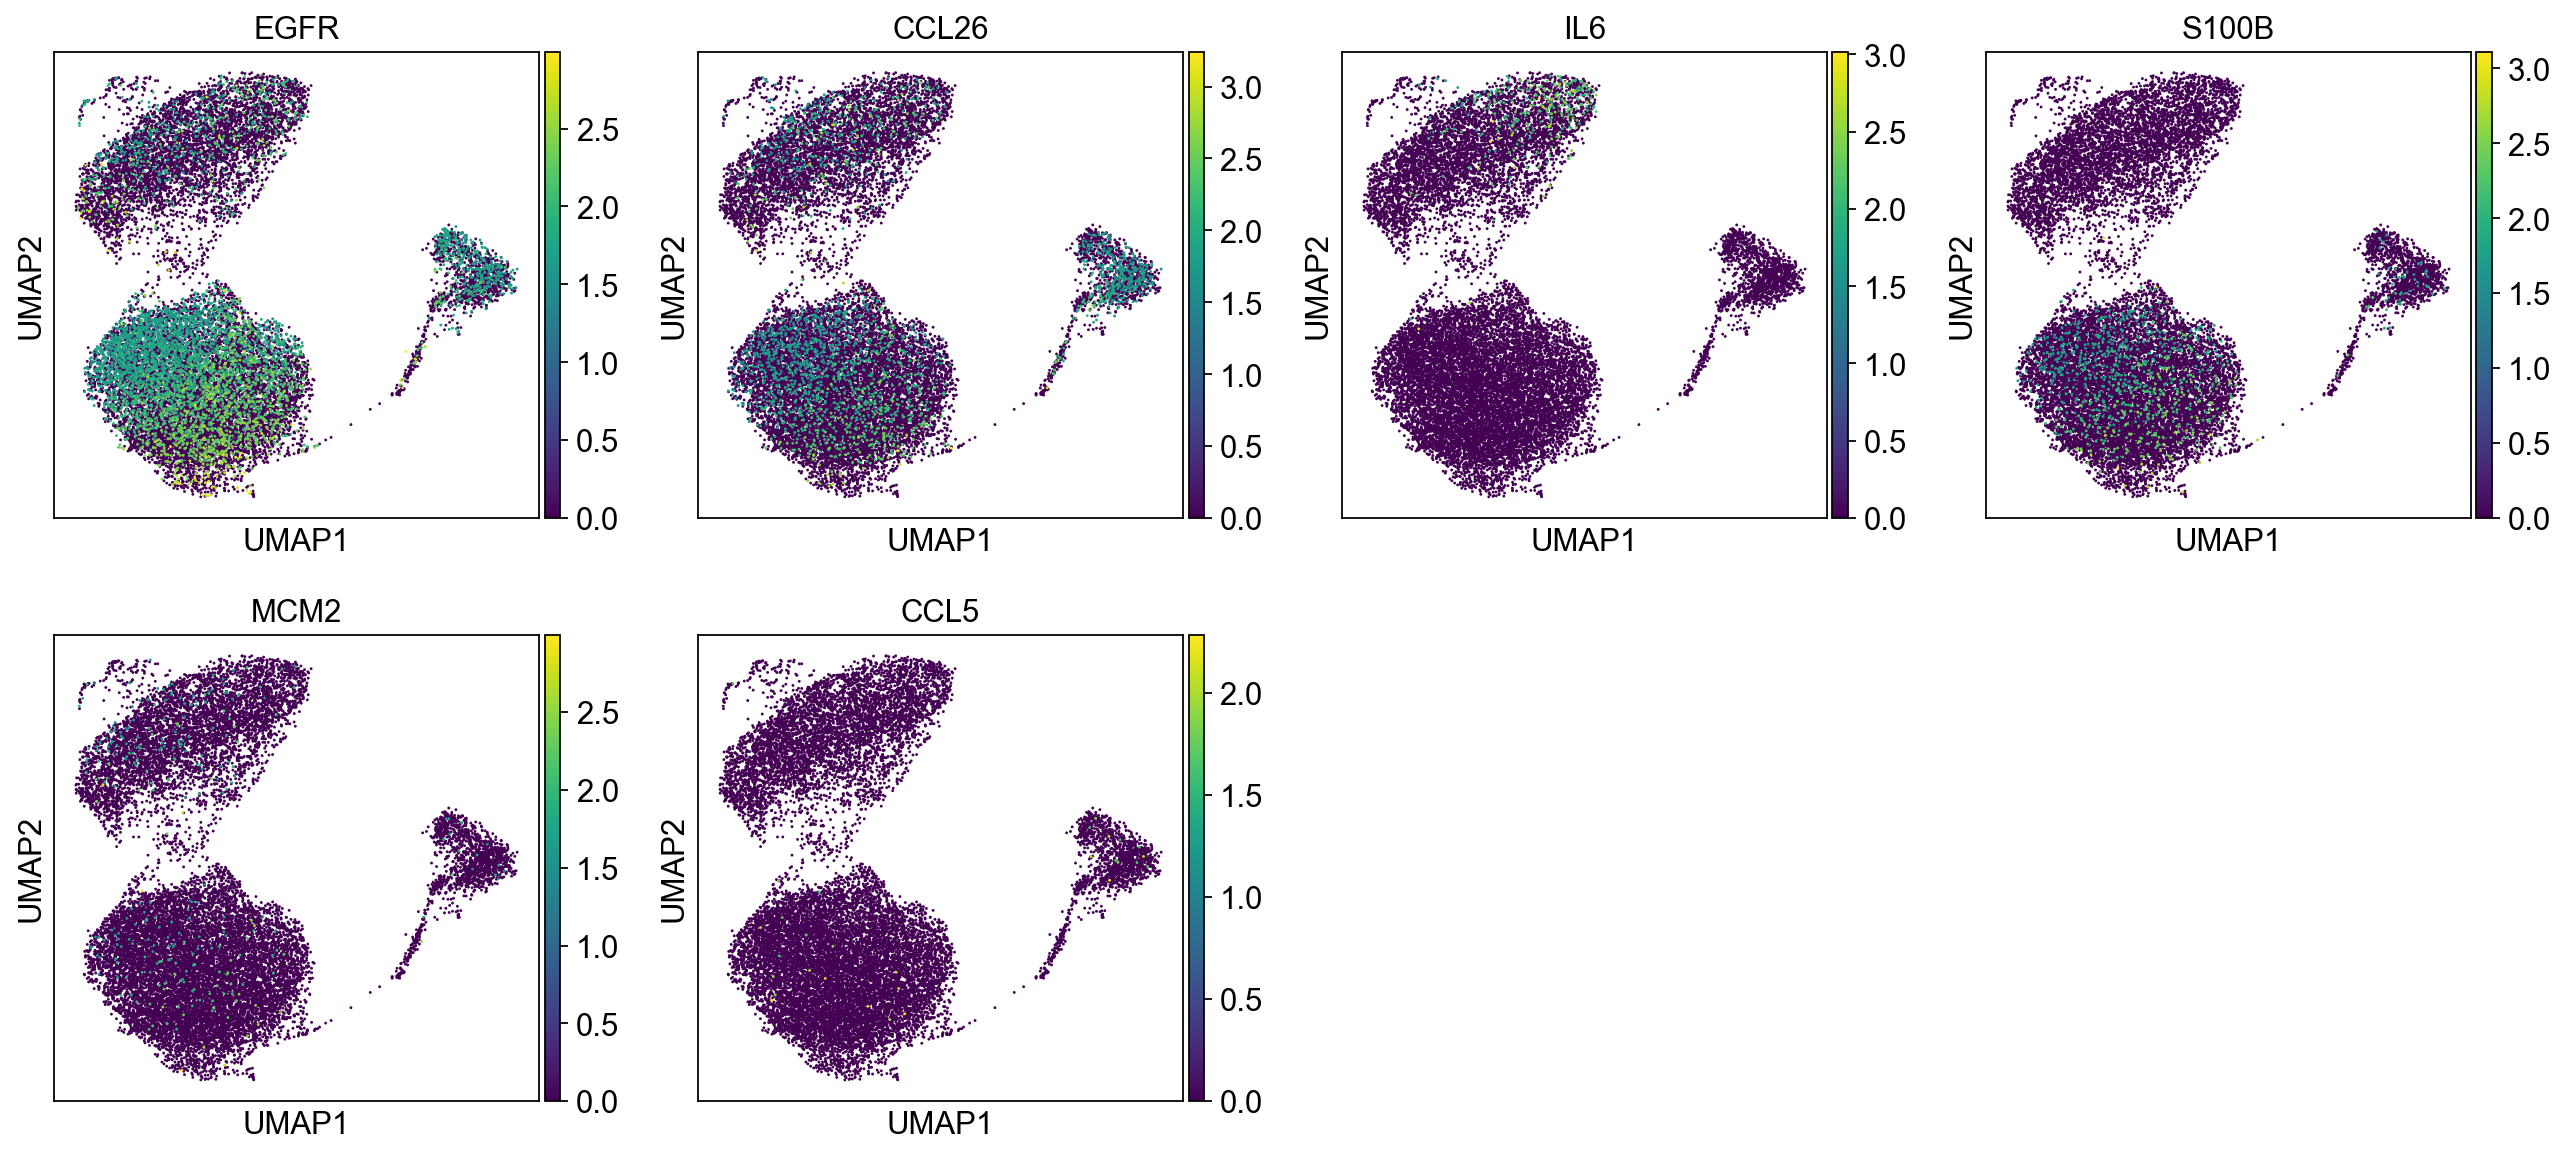

In [37]:
sc.pl.umap(adata, color=['EGFR', 'CCL26', 'IL6', 'S100B', 'MCM2', 'CCL5'] )

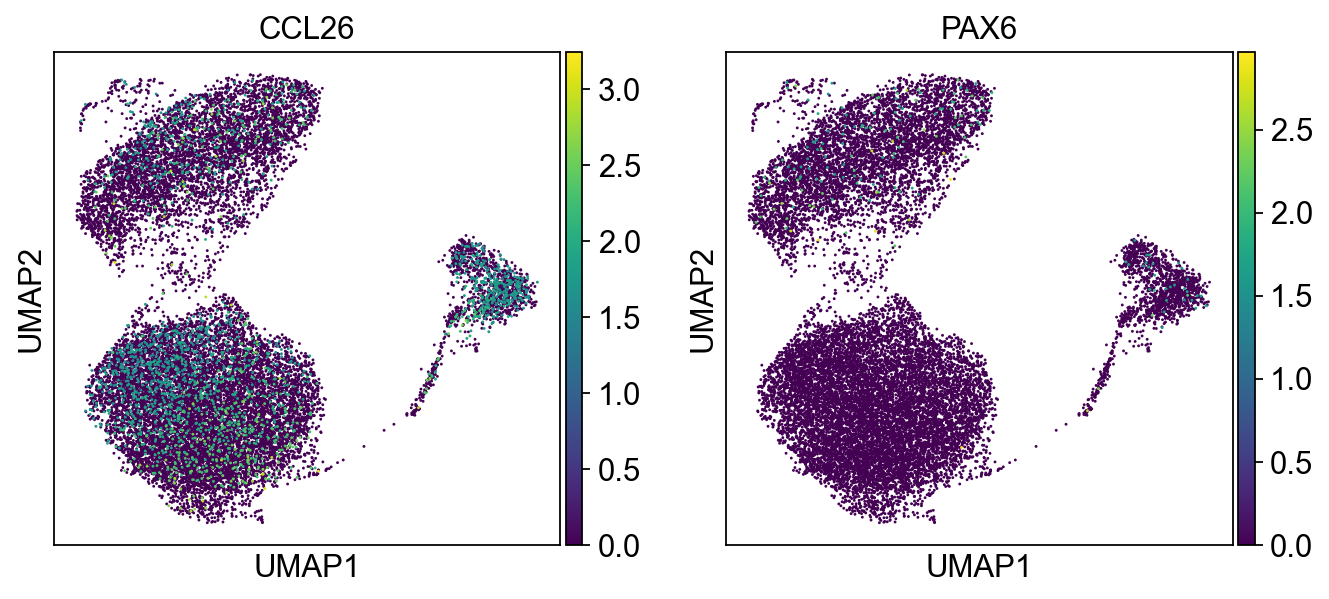

In [38]:
sc.pl.umap(adata, color=['CCL26', 'PAX6'])

In [39]:
sc.tl.leiden(adata, resolution = 0.2)

running Leiden clustering
    finished: found 3 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:02)


C:\Users\88695\AppData\Local\Programs\Python\Python311\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


KeyError: 'CXCL5'

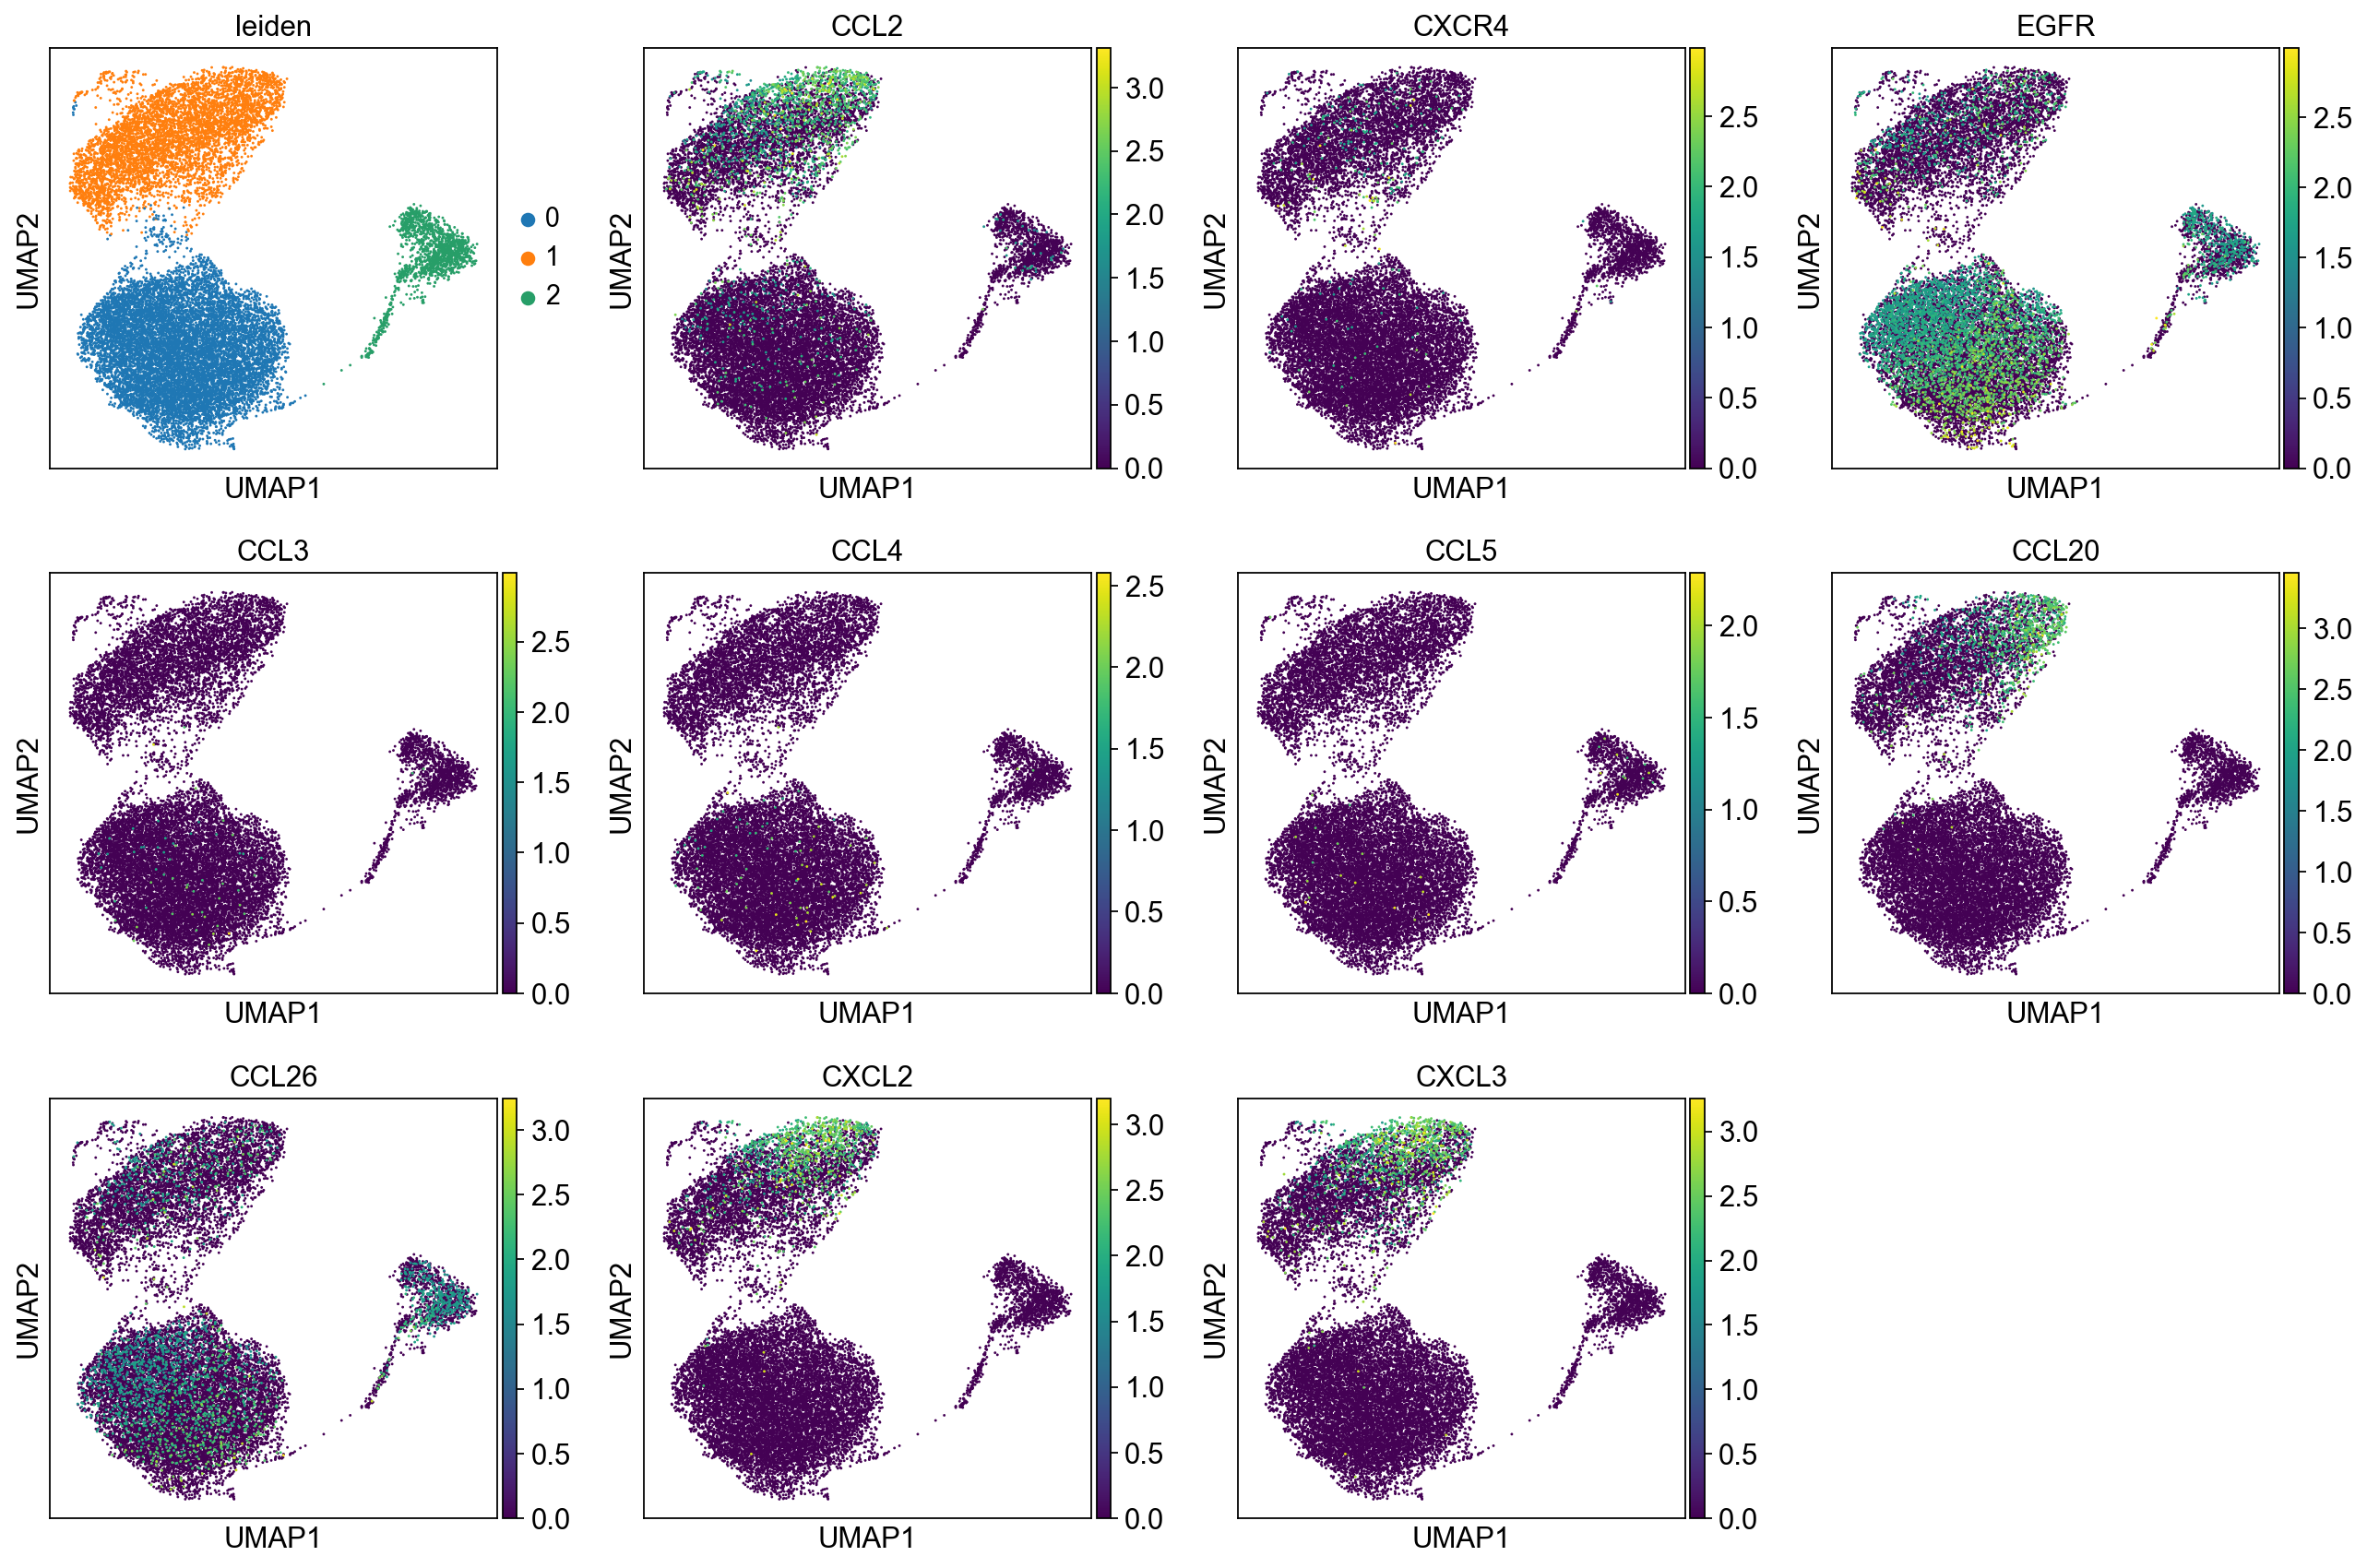

In [40]:
sc.pl.umap(adata, color=['leiden', 'CCL2', 'CXCR4', 'EGFR', 'CCL3', 'CCL4', 'CCL5',  'CCL20', 'CCL26', 'CXCL2',
    'CXCL3', 'CXCL5',  'CXCL8',  'CXCL12'])

In [41]:
chemokine_list = ['CCL2', 'CCL3', 'CCL4', 'CCL20', 'CCL26', 'CCL28', 'CXCL1', 'CXCL2', 'CXCL3', 
                  'CXCL6', 'CXCL8', 'CXCL10', 'CXCL14', 'CCL26'] 

In [42]:
adataR = adata[:, chemokine_list]

ranking genes


C:\Users\88695\AppData\Local\Programs\Python\Python311\Lib\site-packages\anndata\_core\anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  df[key] = c
C:\Users\88695\AppData\Local\Programs\Python\Python311\Lib\site-packages\anndata\_core\anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:03)


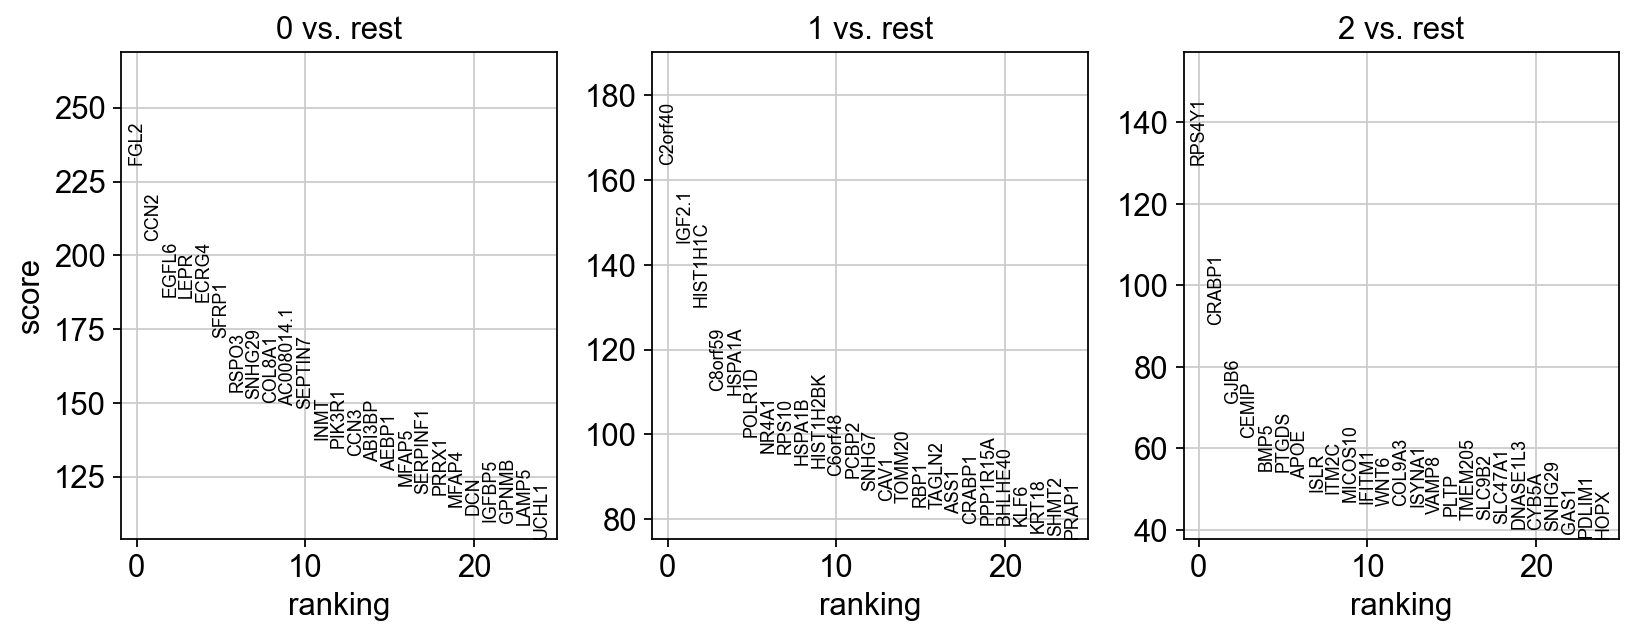

In [43]:
sc.tl.rank_genes_groups(adataR, 'leiden', method='t-test')
sc.pl.rank_genes_groups(adataR, n_genes=25, sharey=False)

In [44]:
sc.settings.verbosity = 2  # reduce the verbosity

In [ ]:
sc.tl.rank_genes_groups(adataR, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(adataR, n_genes=25, sharey=False)

ranking genes


In [ ]:
adata.write(results_file)

In [ ]:
sc.tl.rank_genes_groups(adataR, 'leiden', method='logreg')
sc.pl.rank_genes_groups(adataR, n_genes=25, sharey=False)

In [ ]:
marker_genes = ['IL7R', 'CD79A', 'MS4A1', 'CD8A', 'CD8B', 'LYZ', 'CD14',
                'LGALS3', 'S100A8', 'GNLY', 'NKG7', 'KLRB1',
                'FCGR3A', 'MS4A7', 'FCER1A', 'CST3', 'PPBP']

In [ ]:
adata = sc.read(results_file)

In [ ]:
pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(5)

In [ ]:
result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names
pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals']}).head(5)

In [ ]:
adata = sc.read(results_file)

In [ ]:
sc.pl.rank_genes_groups_violin(adata, groups='0', n_genes=8)

In [ ]:
sc.pl.violin(adata, ['CST3', 'NKG7', 'PPBP'], groupby='leiden')

In [ ]:
new_cluster_names = [
    'CD4 T', 'CD14 Monocytes',
    'B', 'CD8 T',
    'NK', 'FCGR3A Monocytes',
    'Dendritic', 'Megakaryocytes']
adata.rename_categories('leiden', new_cluster_names)

In [ ]:
sc.pl.umap(adata, color='leiden', legend_loc='on data', title='', frameon=False, save='.pdf')

In [ ]:
sc.pl.dotplot(adata, marker_genes, groupby='leiden');

In [ ]:
sc.pl.stacked_violin(adata, marker_genes, groupby='leiden', rotation=90);

In [ ]:
adata

In [ ]:
adata.write(results_file, compression='gzip')  # `compression='gzip'` saves disk space, but slows down writing and subsequent reading

In [ ]:
adata.raw.to_adata().write('./write/pbmc3k_withoutX.h5ad')

In [ ]:
# Export single fields of the annotation of observations
# adata.obs[['n_counts', 'louvain_groups']].to_csv(
#     './write/pbmc3k_corrected_louvain_groups.csv')

# Export single columns of the multidimensional annotation
# adata.obsm.to_df()[['X_pca1', 'X_pca2']].to_csv(
#     './write/pbmc3k_corrected_X_pca.csv')

# Or export everything except the data using `.write_csvs`.
# Set `skip_data=False` if you also want to export the data.
# adata.write_csvs(results_file[:-5], )